In [23]:
# import libraries, other imports are as we go through encoding
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
accident = pd.read_csv('dataset/accident_data.csv')
accident.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


## Data Cleaning

In [25]:
accident.shape

(660679, 14)

In [26]:
# get all the datatypes
# date is a str
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [27]:
# number of unique values in each column
for col in accident.columns:
  print(f'{col}: {accident[col].nunique()}')

Index: 421020
Accident_Severity: 3
Accident Date: 1461
Latitude: 511618
Light_Conditions: 5
District Area: 422
Longitude: 529766
Number_of_Casualties: 36
Number_of_Vehicles: 19
Road_Surface_Conditions: 5
Road_Type: 5
Urban_or_Rural_Area: 3
Weather_Conditions: 8
Vehicle_Type: 16


In [28]:
# make a copy of accident dataframe
accident_copy = accident.copy()

In [29]:
# get general idea of min max for the numerical columns (no anomalies)
accident_copy.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


Accident Date

In [30]:
# turn dates column into three columns: day, month, year
accident_copy['Day'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[0]))
accident_copy['Month'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[1]))
accident_copy['Year'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[2]))

accident_copy['Accident_Date'] = pd.to_datetime(accident['Accident Date'], format="%d-%m-%Y")
accident_copy = accident_copy.drop(columns=['Accident Date'])

Latitude and Longitude

In [31]:
# Drop Longitude/ Latitude
accident_copy = accident_copy.dropna(subset=['Latitude'])
accident_copy = accident_copy.dropna(subset=['Longitude'])

Light_Conditions

In [32]:
# assume NaN for 'Darkness - lighting unknown'
accident_copy['Light_Conditions'] = accident['Light_Conditions'].replace('Darkness - lighting unknown', np.NaN)

District Area

In [33]:
# rename District Area so it is consistent in column formatting
accident_copy = accident_copy.rename(columns={'District Area': 'District_Area'})


Weather_Conditions

In [34]:
# weather conditions seem to have combinations, so we could one hot encode it instead
# the categories include 'Fine', 'High Winds', 'Raining', 'Snowing', 'Fog or mist', 'Other'

# first split up the labels into lists
accident_copy['Weather_Conditions'] = accident['Weather_Conditions'].apply(
    lambda x: ['Fine'] if x == 'Fine no high winds'
    else ['Raining'] if x == 'Raining no high winds'
    else ['Fine', 'High winds'] if x == 'Fine + high winds'
    else ['Raining', 'High winds'] if x == 'Raining + high winds'
    else ['Snowing'] if x == 'Snowing no high winds'
    else ['Fog or mist'] if x == 'Fog or mist'
    else ['Snowing', 'High winds'] if x == 'Snowing + high winds'
    else ['Other'] if x == 'Other'
    else np.NaN
)

Vehicle_Type

In [35]:
# assume NaN for 'Data missing or out of range'
accident_copy['Vehicle_Type'] = accident['Vehicle_Type'].replace('Data missing or out of range', np.NaN)

Urban_or_Rural_Area

In [36]:
# assume NaN for 'Data missing or out of range'
accident_copy['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].replace('Unallocated', np.NaN)

In [37]:
# find out the current number of missing values in the dataset
accident_copy.isnull().sum()

Index                          0
Accident_Severity              0
Latitude                       0
Light_Conditions            6484
District_Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4518
Urban_or_Rural_Area            5
Weather_Conditions         14127
Vehicle_Type                   6
Day                            0
Month                          0
Year                           0
Accident_Date                  0
dtype: int64

In [38]:
# drop all NaN values
accident_copy = accident_copy.dropna()
print(f'Before dropping missing values: {accident.shape[0]} rows')
print(f'After dropping missing values: {accident_copy.shape[0]} rows')

Before dropping missing values: 660679 rows
After dropping missing values: 638022 rows


In [39]:
# cleaned, but before encoding
accident_copy.head()

,Index,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year,Accident_Date
0,200701BS64157,Serious,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,[Fine],Car,5,6,2019,2019-06-05
1,200701BS65737,Serious,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,[Raining],Car,2,7,2019,2019-07-02
3,200701BS66128,Serious,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,[Fine],Bus or coach (17 or more pass seats),16,8,2019,2019-08-16
5,200701BS67159,Serious,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,[Fine],Car,18,9,2019,2019-09-18
6,200701BS67207,Serious,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,[Fine],Van / Goods 3.5 tonnes mgw or under,5,9,2019,2019-09-05


## Exploring Data

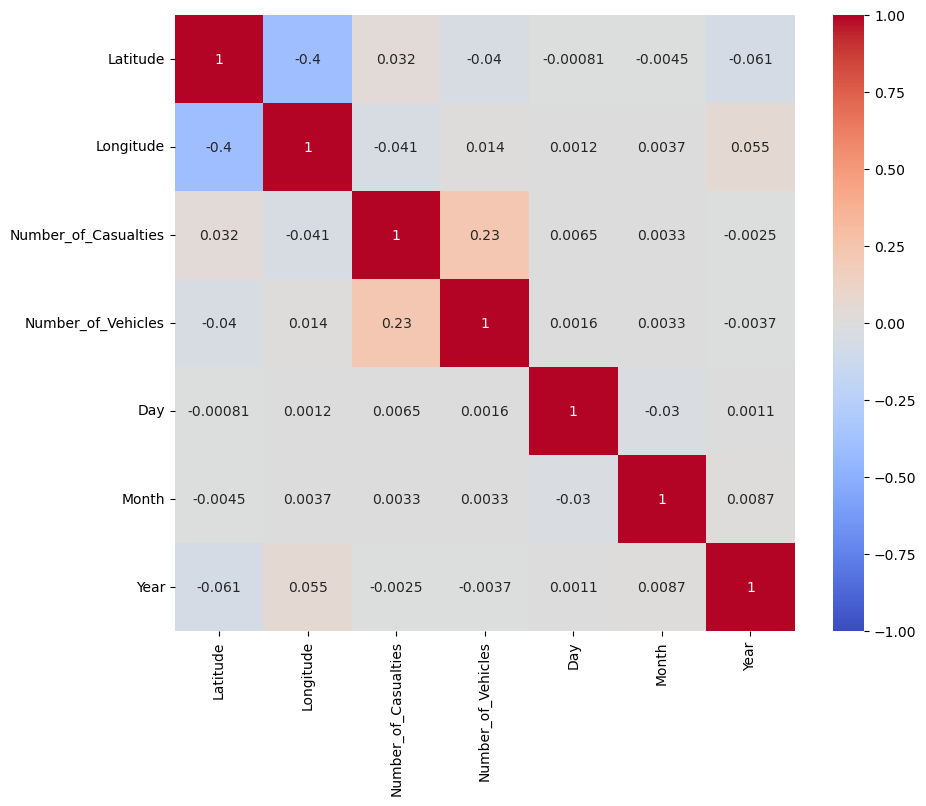

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(accident_copy.select_dtypes(include=['float64', 'int64']).corr(), vmin=-1, vmax=1, center=0, annot=True, cmap= 'coolwarm')
plt.show()

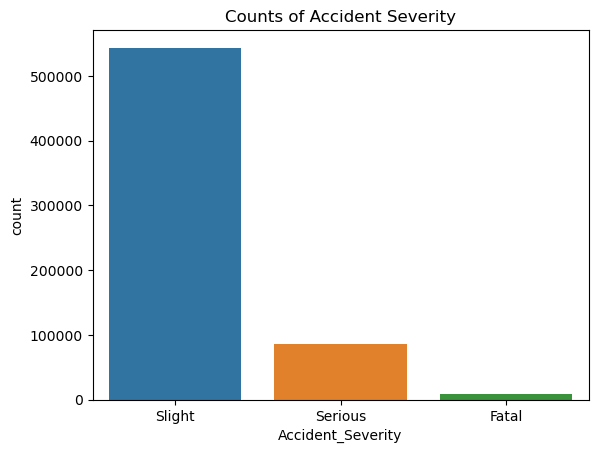

In [41]:
# our data has a lot more Slight casualties
sns.countplot(data = accident_copy, x = 'Accident_Severity', order=['Slight', 'Serious', 'Fatal'])
plt.title('Counts of Accident Severity')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


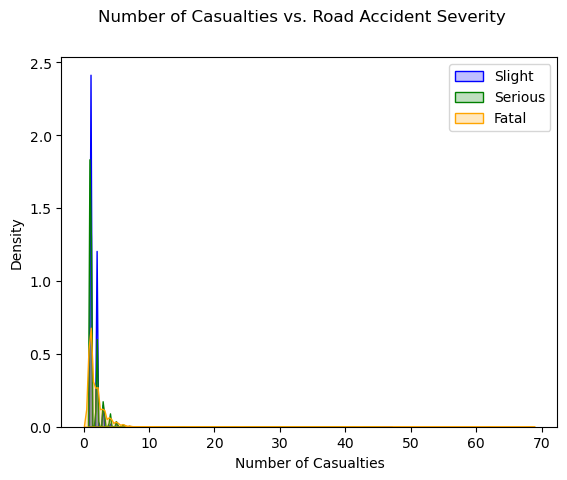

In [42]:
fig, ax = plt.subplots()

sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Slight"]["Number_of_Casualties"], fill=True, color="blue", label="Slight", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Serious"]["Number_of_Casualties"], fill=True, color="green", label="Serious", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Fatal"]["Number_of_Casualties"], fill=True, color="orange", label="Fatal", ax=ax)

ax.set_xlabel("Number of Casualties")
ax.set_ylabel("Density")

fig.suptitle("Number of Casualties vs. Road Accident Severity")

ax.legend()
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


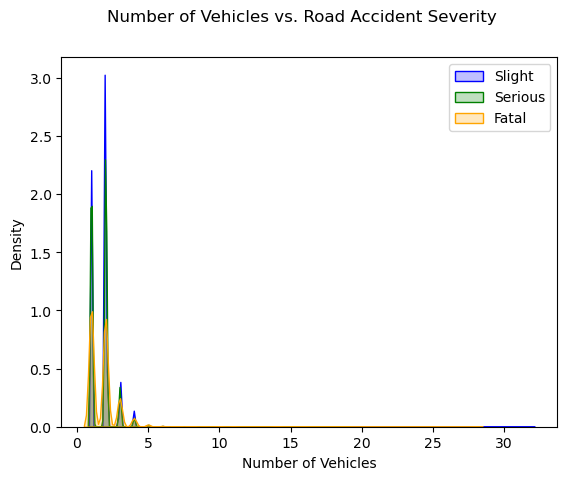

In [43]:
fig, ax = plt.subplots()

sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Slight"]["Number_of_Vehicles"], fill=True, color="blue", label="Slight", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Serious"]["Number_of_Vehicles"], fill=True, color="green", label="Serious", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Fatal"]["Number_of_Vehicles"], fill=True, color="orange", label="Fatal", ax=ax)

ax.set_xlabel("Number of Vehicles")
ax.set_ylabel("Density")

fig.suptitle("Number of Vehicles vs. Road Accident Severity")

ax.legend()
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


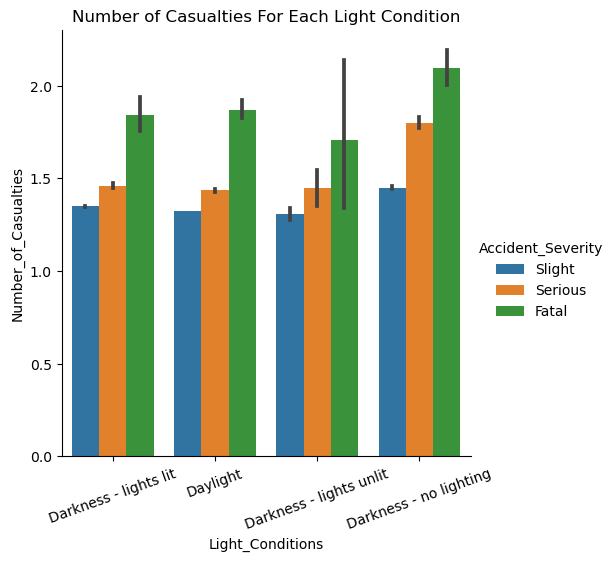

In [44]:
sns.catplot(data=accident_copy, x="Light_Conditions", y="Number_of_Casualties", 
            hue='Accident_Severity', hue_order=['Slight', 'Serious', 'Fatal'], kind="bar")
plt.xticks(rotation=20)
plt.title('Number of Casualties For Each Light Condition')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


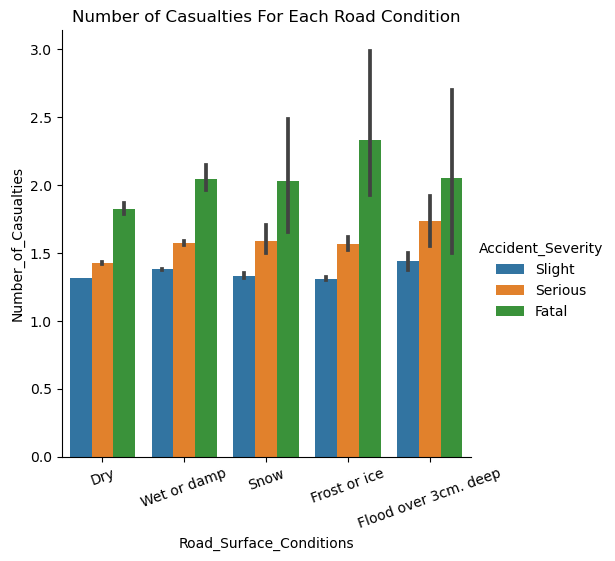

In [45]:
sns.catplot(data=accident_copy, x="Road_Surface_Conditions", y="Number_of_Casualties", 
            hue='Accident_Severity', hue_order=['Slight', 'Serious', 'Fatal'], kind="bar")
plt.xticks(rotation=20)
plt.title('Number of Casualties For Each Road Condition')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


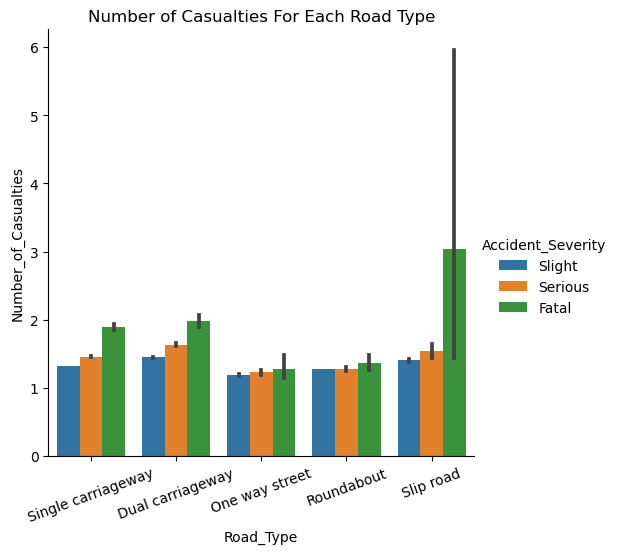

In [46]:
sns.catplot(data=accident_copy, x="Road_Type", y="Number_of_Casualties", 
            hue='Accident_Severity', hue_order=['Slight', 'Serious', 'Fatal'], kind="bar")
plt.xticks(rotation=20)
plt.title('Number of Casualties For Each Road Type')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


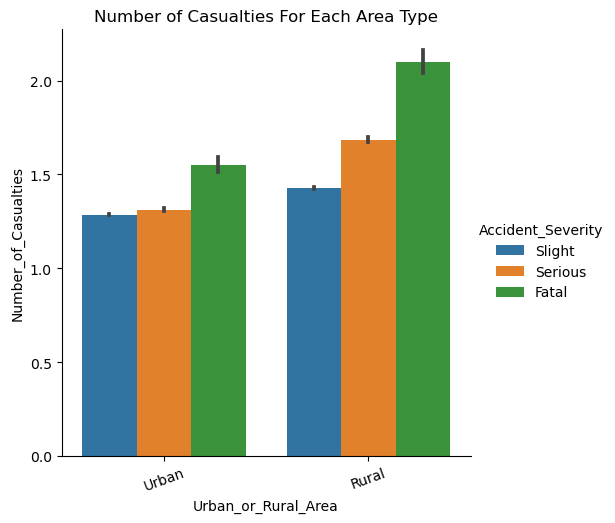

In [47]:
sns.catplot(data=accident_copy, x="Urban_or_Rural_Area", y="Number_of_Casualties", 
            hue='Accident_Severity', hue_order=['Slight', 'Serious', 'Fatal'], kind="bar")
plt.xticks(rotation=20)
plt.title('Number of Casualties For Each Area Type')
plt.show()

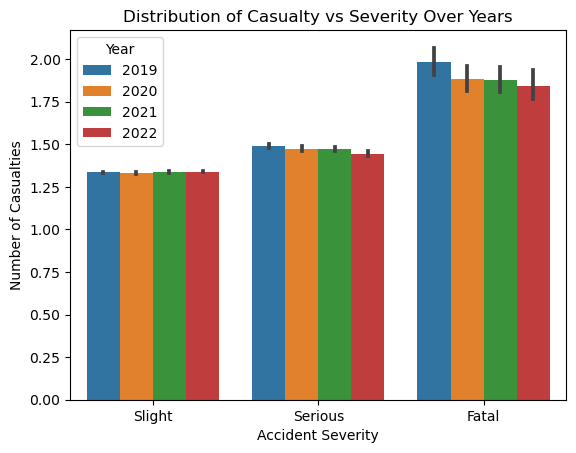

In [53]:
#accident counts over time for each severity
sns.barplot(data=accident_copy, x='Accident_Severity', y='Number_of_Casualties', hue='Year', order=['Slight', 'Serious', 'Fatal'])
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualty vs Severity Over Years')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


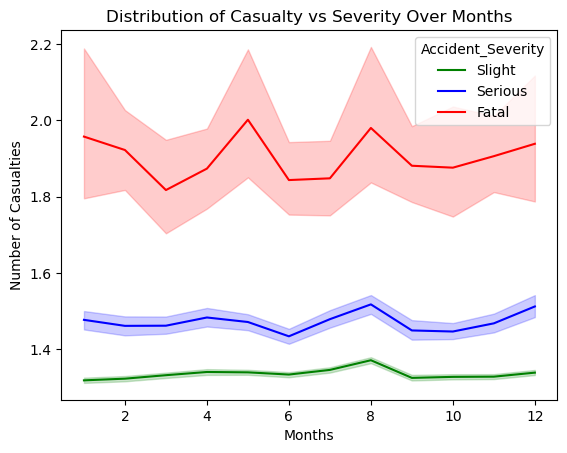

In [58]:
sns.lineplot(data=accident_copy, x='Month', y='Number_of_Casualties',
              hue='Accident_Severity', palette=['green', 'blue', 'red'],
              hue_order=['Slight', 'Serious', 'Fatal'])
plt.xlabel('Months')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualty vs Severity Over Months')
plt.show()

In [50]:
accident_copy['Month'].unique()

array([ 6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5, 12])

In [ ]:
accident_copy['Weather_Conditions']

## Encoding

In [ ]:
# Use One Hot Encoder on all categorical columns except Weather_Conditions
from sklearn.preprocessing import OneHotEncoder
# categorical columns include Light_Conditions, District_Area,
# Road_Surface_Conditions, Road_Type,	Urban_or_Rural_Area,
# Weather_Conditions, Vehicle_Type

categorical = ['Road_Surface_Conditions', 'Road_Type',	'Urban_or_Rural_Area', 'Vehicle_Type']

for col in categorical:
  ohe = OneHotEncoder()
  categorical_ohe = ohe.fit_transform(accident_copy[[col]]).toarray()
  df = pd.DataFrame(categorical_ohe, columns=list(ohe.categories_[0]))
  accident_copy[ohe.categories_[0]] = categorical_ohe
  accident_copy = accident_copy.drop(columns=[col])

In [ ]:
# use MultiLabelBinarizer on Weather_Conditions??
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
weather = mlb.fit_transform(accident_copy['Weather_Conditions'])
# one for everything that was in the weather condition that day
accident_copy[mlb.classes_] = weather
accident_copy = accident_copy.drop(columns=['Weather_Conditions'])

In [ ]:
accident_copy